In [111]:
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

In [118]:
########### CONSTANTES ###########
#Ruta al archivo de los datos
FILE="restricciones/data_ccaa.json"
NUM_EXE=50
########### VARIABLES ###########
total_quimera=0
total_pegasus=0
total_quimera_time=0
total_pegasus_time=0
qubits_sol_quimera=[]
qubits_sol_pegasus=[]
total_quimera_sols=0
total_pegasus_sols=0

In [119]:
#Obtenemos los datos del archivo Python
with open(FILE) as f:
    data_ccaa = json.load(f)
for i in data_ccaa:
    architecture =i['architecture']
    time=i['qpu_time']
    num_sol=i['num_sols']
    qubits=i['qubits']
    if(architecture=='Quimera'):
        total_quimera +=1
        total_quimera_time+=time
        total_quimera_sols+=num_sol
        qubits_sol_quimera.append((qubits,num_sol))
    else:
        total_pegasus +=1
        total_pegasus_time+=time
        total_pegasus_sols+=num_sol
        qubits_sol_pegasus.append((qubits,num_sol))


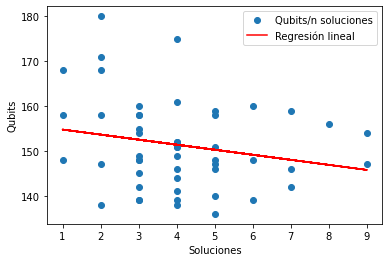

Valor de r cuadrado en pegasus : -0.21330810740545303


In [125]:
#Representamos los datos de Pegasus y calculamos su regresion lineal
if(total_pegasus>0):
    y= [i[0] for i in qubits_sol_pegasus]
    x= [i[1] for i in qubits_sol_pegasus]
    stats_linregress = stats.linregress(x, y)
    plt.plot(x,y,'o',label='Qubits/n soluciones')
    plt.plot(x,stats_linregress.intercept + stats_linregress.slope*np.array(x), 'r', label='Regresión lineal')
    plt.ylabel("Qubits")
    plt.xlabel("Soluciones")
    plt.legend(loc='best')
    plt.show()
    print("Valor de r cuadrado en pegasus : "+str(stats_linregress.rvalue))

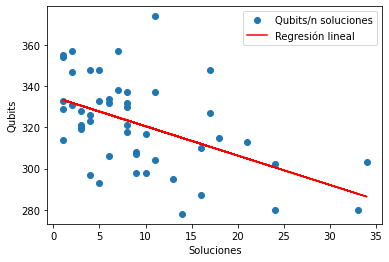

Valor de r cuadrado en quimera : -0.5039151381428222


In [126]:
#Representamos los datos de Quimera y su regresion lineal
if(total_quimera>0):
    y= [i[0] for i in qubits_sol_quimera]
    x= [i[1] for i in qubits_sol_quimera]
    stats_linregress = stats.linregress(x, y)
    plt.plot(x,y,'o',label='Qubits/n soluciones')
    plt.plot(x,stats_linregress.intercept + stats_linregress.slope*np.array(x), 'r', label='Regresión lineal')
    plt.ylabel("Qubits")
    plt.xlabel("Soluciones")
    plt.legend(loc='best')
    plt.show()
    rvalue_quimera = stats.linregress(x, y).rvalue
    print("Valor de r cuadrado en quimera : "+str(rvalue_quimera))

In [129]:
#Comparamos el tiempo de acceso a la QPU
if(total_quimera == 0 or total_pegasus == 0):
    print("No hay datos de alguno de los solvers luego no se puede comparar")
else:
    avg_time_quimera=total_quimera_time/total_quimera
    avg_time_pegasus=total_pegasus_time/total_pegasus
    print("Tiempo medio de Quimera (micro s) "+str(avg_time_quimera))
    print("Tiempo medio de Pegasus (micro s) "+str(avg_time_pegasus))
    print("El tiempo de uso de la QPU de Quimera es "+str(round(avg_time_quimera/avg_time_pegasus,2))+" veces en comparacion con pegasus")

Tiempo medio de Quimera (micro s) 59904.30612244898
Tiempo medio de Pegasus (micro s) 39378.38
El tiempo de uso de la QPU de Quimera es 1.52 veces en comparacion con pegasus


In [130]:
#Comparamos el numero de soluciones apoortadas
if(total_quimera == 0 or total_pegasus == 0):
    print("No hay datos de alguno de los solvers luego no se puede comparar")
else:
    avg_sols_quimera=total_quimera_sols/total_quimera
    avg_sols_pegasus=total_pegasus_sols/total_pegasus
    print("Soluciones medias de Quimera "+str(avg_sols_quimera))
    print("Soluciones medias de Pegasus "+str(avg_sols_pegasus))
    print("Quimera da un total de  "+str(round(avg_sols_quimera/avg_sols_pegasus,2))+" soluciones en comparacion con pegasus")
if(total_quimera==NUM_EXE):
    print("Quimera encontro soluciones correctas en todas las ejecuciones")
else:
    print("Quimera no encontro soluciones al problema en "+ str(NUM_EXE-total_quimera)+" veces")
if(total_pegasus==NUM_EXE):
    print("Pegasus encontro soluciones correctas en todas las ejecuciones")
else:
    print("Pegasus no encontro soluciones al problema en "+ str(NUM_EXE-total_pegasus)+" veces")

Soluciones medias de Quimera 9.244897959183673
Soluciones medias de Pegasus 4.08
Quimera da un total de  2.27 soluciones en comparacion con pegasus
Quimera no encontro soluciones al problema en 1 veces
Pegasus encontro soluciones correctas en todas las ejecuciones


In [131]:
#Comparamos la cantidad de Qubits fisicos usados para el embedding
if(total_quimera == 0 or total_pegasus == 0):
    print("No hay datos de alguno de los solvers luego no se puede comparar")
else:
    qubits_quimera = sum([i[0] for i in qubits_sol_quimera])
    qubits_pegasus = sum([i[0] for i in qubits_sol_pegasus])
    avg_qubits_quimera=qubits_quimera/total_quimera
    avg_qubits_pegasus=qubits_pegasus/total_pegasus
    print("Qubits fisicos medias de Quimera "+str(avg_qubits_quimera))
    print("Qubits fisicos de Pegasus "+str(avg_qubits_pegasus))
    print("Quimera usa "+str(round(avg_qubits_quimera/avg_qubits_pegasus,2))+" qubits en comparacion con pegasus")

Qubits fisicos medias de Quimera 321.6734693877551
Qubits fisicos de Pegasus 151.32
Quimera usa 2.13 qubits en comparacion con pegasus
